In [1]:
import pandas as pd
import numpy as np


In [2]:
MNCAA = pd.read_csv('data/Stage1/MNCAATourneyDetailedResults.csv')
RegularSeason = pd.read_csv('data/Stage1/MRegularSeasonDetailedResults.csv')
MNCAA.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [3]:
MNCAA = MNCAA.loc[MNCAA['Season'] >= 2003]
MNCAA.loc[:,'Competition'] = 'MNCAA'
MNCAA.loc[:,'WTeam'] = 0

for i,_ in enumerate(MNCAA.iterrows()):
    if MNCAA.iloc[i,2] > MNCAA.iloc[i,4]:
        MNCAA.iloc[i,2],MNCAA.iloc[i,4] = MNCAA.iloc[i,4],MNCAA.iloc[i,2]
        MNCAA.iloc[i,35] = 1

        
MNCAA = MNCAA.rename(columns={"WTeamID": "Team0_ID", "LTeamID": "Team1_ID"})

MNCAA.head(15)


,Season,DayNum,Team0_ID,WScore,Team1_ID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Competition,WTeam
0,2003,134,1411,92,1421,84,N,1,32,69,...,31,17,28,16,15,5,0,22,MNCAA,1
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,8,26,12,17,10,3,15,MNCAA,0
2,2003,136,1113,84,1272,71,N,0,31,59,...,21,20,22,11,12,2,5,18,MNCAA,0
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,14,17,20,21,6,6,21,MNCAA,0
4,2003,136,1143,76,1301,74,N,1,27,64,...,20,10,26,16,14,5,8,19,MNCAA,0
5,2003,136,1140,58,1163,53,N,0,17,52,...,13,15,26,11,11,8,4,22,MNCAA,1
6,2003,136,1161,67,1181,57,N,0,19,54,...,22,11,24,8,19,5,4,19,MNCAA,1
7,2003,136,1153,74,1211,69,N,0,20,47,...,10,13,22,13,10,7,6,24,MNCAA,1
8,2003,136,1228,65,1443,60,N,0,24,56,...,13,17,18,10,14,6,5,16,MNCAA,0
9,2003,136,1242,64,1429,61,N,0,28,51,...,10,13,19,13,13,6,1,15,MNCAA,0


In [4]:
RegularSeason = RegularSeason.loc[RegularSeason['Season'] >= 2003]
RegularSeason.loc[:,'Competition'] = 'RegularSeason'
RegularSeason.loc[:,'WTeam'] = 0

for i,_ in enumerate(RegularSeason.iterrows()):
    if RegularSeason.iloc[i,2] > RegularSeason.iloc[i,4]:
        RegularSeason.iloc[i,2],RegularSeason.iloc[i,4] = RegularSeason.iloc[i,4],RegularSeason.iloc[i,2]
        RegularSeason.iloc[i,35] = 1
        
RegularSeason = RegularSeason.rename(columns={"WTeamID": "Team0_ID", "LTeamID": "Team1_ID"})

RegularSeason

,Season,DayNum,Team0_ID,WScore,Team1_ID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Competition,WTeam
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,10,22,8,18,9,2,20,RegularSeason,0
1,2003,10,1272,70,1393,63,N,0,26,62,...,20,20,25,7,12,8,6,16,RegularSeason,0
2,2003,11,1266,73,1437,61,N,0,24,58,...,23,31,22,9,12,2,5,23,RegularSeason,0
3,2003,11,1296,56,1457,50,N,0,18,38,...,15,17,20,9,19,4,3,23,RegularSeason,0
4,2003,11,1208,77,1400,71,N,0,30,61,...,27,21,15,12,10,7,1,14,RegularSeason,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87499,2019,132,1153,69,1222,57,N,0,22,50,...,18,17,16,8,7,2,4,19,RegularSeason,0
87500,2019,132,1209,73,1426,64,N,0,20,50,...,17,13,28,12,14,5,2,24,RegularSeason,0
87501,2019,132,1276,65,1277,60,N,0,22,55,...,12,3,26,17,6,5,5,11,RegularSeason,1
87502,2019,132,1382,55,1387,53,N,0,22,59,...,10,13,30,9,11,2,7,16,RegularSeason,1


# Implémentation des features

## Features de performances sportives des équipes

In [5]:
df = pd.concat([MNCAA,RegularSeason])
df_features = df
df=df[['Season','DayNum','Team0_ID','Team1_ID']]

In [6]:

df_features

,Season,DayNum,Team0_ID,WScore,Team1_ID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Competition,WTeam
0,2003,134,1411,92,1421,84,N,1,32,69,...,31,17,28,16,15,5,0,22,MNCAA,1
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,8,26,12,17,10,3,15,MNCAA,0
2,2003,136,1113,84,1272,71,N,0,31,59,...,21,20,22,11,12,2,5,18,MNCAA,0
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,14,17,20,21,6,6,21,MNCAA,0
4,2003,136,1143,76,1301,74,N,1,27,64,...,20,10,26,16,14,5,8,19,MNCAA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87499,2019,132,1153,69,1222,57,N,0,22,50,...,18,17,16,8,7,2,4,19,RegularSeason,0
87500,2019,132,1209,73,1426,64,N,0,20,50,...,17,13,28,12,14,5,2,24,RegularSeason,0
87501,2019,132,1276,65,1277,60,N,0,22,55,...,12,3,26,17,6,5,5,11,RegularSeason,1
87502,2019,132,1382,55,1387,53,N,0,22,59,...,10,13,30,9,11,2,7,16,RegularSeason,1


In [7]:
df_features['WPre'] = df_features['WFGM']/df_features['WFGA']
df_features['LPre'] = df_features['LFGM']/df_features['LFGA']

df_features['WPre3'] = df_features['WFGM3']/df_features['WFGA3']
df_features['LPre3'] = df_features['LFGM3']/df_features['LFGA3']

df_features['WPourc3'] = df_features['WFGM3']/df_features['WFGM']
df_features['LPourc3'] = df_features['LFGM3']/df_features['LFGM']


df_features['WPourcAst'] = df_features['WAst']/df_features['WFGM']
df_features['LPourcAst'] = df_features['LAst']/df_features['LFGM']



In [8]:
df_features['WBlocks'] = (df_features['WBlk']) / (df_features['LFGA'])
df_features['LBlocks'] = (df_features['LBlk']) / (df_features['WFGA'])

df_features['WBlocks'] = (df_features['WBlk']) / (df_features['LFGA'])
df_features['LBlocks'] = (df_features['LBlk']) / (df_features['WFGA'])

df_features['WRecupBall'] = (df_features['WDR']+df_features['WStl']) / df_features['WTO']
df_features['LRecupBall'] = (df_features['LDR']+df_features['LStl']) / df_features['LTO']

In [9]:
df_features = df_features[['Season','DayNum','Team0_ID','Team1_ID','WTeam','WPre','LPre','WPre3','LPre3','WPourc3','LPourc3','WPourcAst','LPourcAst','WBlocks','LBlocks','WBlocks','LBlocks','WRecupBall','LRecupBall']]

In [10]:
df

,Season,DayNum,Team0_ID,Team1_ID
0,2003,134,1411,1421
1,2003,136,1112,1436
2,2003,136,1113,1272
3,2003,136,1141,1166
4,2003,136,1143,1301
...,...,...,...,...
87499,2019,132,1153,1222
87500,2019,132,1209,1426
87501,2019,132,1276,1277
87502,2019,132,1382,1387


## Features de Seed

In [42]:
tourney_seed = pd.read_csv('data/Stage1/MNCAATourneySeeds.csv')

In [43]:
tourney_seed

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2281,2019,Z12,1332
2282,2019,Z13,1414
2283,2019,Z14,1330
2284,2019,Z15,1159


In [44]:
tourney_result = pd.merge(df, tourney_seed, left_on=['Season', 'Team0_ID'], right_on=['Season', 'TeamID'], how='left')
tourney_result.rename(columns={'Seed':'SeedT1'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)
tourney_result = pd.merge(tourney_result, tourney_seed, left_on=['Season', 'Team1_ID'], right_on=['Season', 'TeamID'], how='left')
tourney_result.rename(columns={'Seed':'SeedT2'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)

In [45]:
tourney_result

,Season,DayNum,Team0_ID,Team1_ID,SeedT1,SeedT2
0,2003,134,1411,1421,X16a,X16b
1,2003,136,1112,1436,Z01,Z16
2,2003,136,1113,1272,Z10,Z07
3,2003,136,1141,1166,Z11,Z06
4,2003,136,1143,1301,W08,W09
...,...,...,...,...,...,...
88614,2019,132,1153,1222,Z07,Y03
88615,2019,132,1209,1426,Y14,NaN
88616,2019,132,1276,1277,X02,W02
88617,2019,132,1382,1387,NaN,W13


In [46]:
tourney_result = pd.merge(tourney_result,df_features,right_on = ['Season','DayNum','Team0_ID','Team1_ID'], left_on=['Season','DayNum','Team0_ID','Team1_ID'], how='left')

In [47]:
tourney_result.isnull().sum()

Season            0
DayNum            0
Team0_ID          0
Team1_ID          0
SeedT1        70016
SeedT2        69138
WTeam             0
WPre              0
LPre              0
WPre3             0
LPre3             0
WPourc3           0
LPourc3           0
WPourcAst         0
LPourcAst         0
WBlocks           0
LBlocks           0
WBlocks           0
LBlocks           0
WRecupBall        0
LRecupBall        0
dtype: int64

In [48]:
tourney_result=tourney_result.dropna()

In [49]:
def get_seed(x):
    return str(x[0])

tourney_result['ConfT1'] = tourney_result['SeedT1'].map(lambda x: get_seed(x))
tourney_result['ConfT2'] = tourney_result['SeedT2'].map(lambda x: get_seed(x))

In [50]:
def get_seed(x):
    return int(x[1:3])

tourney_result['SeedT1'] = tourney_result['SeedT1'].map(lambda x: get_seed(x))
tourney_result['SeedT2'] = tourney_result['SeedT2'].map(lambda x: get_seed(x))

In [51]:
tourney_result['Seed_diff'] = tourney_result['SeedT1'] - tourney_result['SeedT2']

In [52]:
tourney_result = tourney_result.reset_index(drop = True)

In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [54]:
from sklearn.preprocessing import LabelBinarizer

jobs_encoder = LabelBinarizer()
jobs_encoder.fit(tourney_result['ConfT1'])
transformed = jobs_encoder.transform(tourney_result['ConfT1'])
ohe_df = pd.DataFrame(transformed)
tourney_result = pd.concat([tourney_result, ohe_df], axis=1)

In [55]:
tourney_result.rename(columns={0:'W1',1:'X1',2:'Z1',3:'Y1'}, inplace=True)

In [56]:
tourney_result = tourney_result.drop('ConfT1', axis=1)

In [57]:
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(tourney_result['ConfT2'])
transformed = jobs_encoder.transform(tourney_result['ConfT2'])
ohe_df = pd.DataFrame(transformed)
tourney_result = pd.concat([tourney_result, ohe_df], axis=1)

In [58]:
tourney_result.rename(columns={0:'W2',1:'X2',2:'Z2',3:'Y2'}, inplace=True)

In [59]:
tourney_result=tourney_result.drop('ConfT2', axis=1)

In [29]:
#tourney_result.to_csv('df.csv',sep='\t',index=False)

# Modélisation et apprentissage

## Données test pour l'apprentissage

In [60]:
tourney_result

,Season,DayNum,Team0_ID,Team1_ID,SeedT1,SeedT2,WTeam,WPre,LPre,WPre3,...,LRecupBall,Seed_diff,W1,X1,Z1,Y1,W2,X2,Z2,Y2
0,2003,134,1411,1421,16,16,1,0.463768,0.432836,0.379310,...,2.200000,0,0,1,0,0,0,1,0,0
1,2003,136,1112,1436,1,16,0,0.469697,0.312500,0.304348,...,2.117647,-15,0,0,0,1,0,0,0,1
2,2003,136,1113,1272,10,7,0,0.525424,0.362319,0.428571,...,2.000000,3,0,0,0,1,0,0,0,1
3,2003,136,1141,1166,11,6,0,0.547170,0.450000,0.428571,...,1.095238,5,0,0,0,1,0,0,0,1
4,2003,136,1143,1301,8,9,0,0.421875,0.446429,0.350000,...,2.214286,-1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,2019,131,1246,1397,2,2,1,0.464286,0.535714,0.476190,...,2.363636,0,0,0,1,0,0,0,0,1
6068,2019,131,1371,1437,10,6,1,0.415094,0.405797,0.354839,...,4.428571,4,0,0,1,0,0,0,0,1
6069,2019,132,1120,1397,5,2,0,0.406250,0.450980,0.375000,...,1.764706,3,0,0,1,0,0,0,0,1
6070,2019,132,1153,1222,7,3,0,0.440000,0.306452,0.352941,...,2.571429,4,0,0,0,1,0,0,1,0


In [61]:
Train = tourney_result.loc[tourney_result['Season']>=2003]
Train = tourney_result.loc[tourney_result['Season']<=2014]


X_train = Train.drop('WTeam', axis=1)
y_train = Train.WTeam

In [62]:
y_train.astype('category').values

[1, 0, 0, 0, 0, ..., 1, 0, 1, 0, 1]
Length: 4175
Categories (2, int64): [0, 1]

In [63]:
Test = tourney_result.loc[tourney_result['Season']>=2015]
X_test = Test.drop('WTeam', axis=1)
y_test = Test.WTeam

In [64]:
y_test.astype('category').values

[0, 1, 1, 1, 0, ..., 1, 1, 0, 0, 1]
Length: 1897
Categories (2, int64): [0, 1]

In [65]:
X_test

,Season,DayNum,Team0_ID,Team1_ID,SeedT1,SeedT2,WPre,LPre,WPre3,LPre3,...,LRecupBall,Seed_diff,W1,X1,Z1,Y1,W2,X2,Z2,Y2
780,2015,134,1214,1264,16,16,0.490566,0.370968,0.428571,0.240000,...,2.000000,0,0,0,1,0,0,0,1,0
781,2015,134,1140,1279,11,11,0.450000,0.482759,0.304348,0.517241,...,2.200000,0,0,0,0,1,0,0,0,1
782,2015,135,1129,1173,11,11,0.476190,0.400000,0.333333,0.300000,...,2.888889,0,1,0,0,0,1,0,0,0
783,2015,135,1316,1352,16,16,0.451613,0.480769,0.250000,0.409091,...,1.578947,0,0,1,0,0,0,1,0,0
784,2015,136,1112,1411,2,15,0.603774,0.470588,0.454545,0.416667,...,1.777778,-13,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,2019,131,1246,1397,2,2,0.464286,0.535714,0.476190,0.454545,...,2.363636,0,0,0,1,0,0,0,0,1
6068,2019,131,1371,1437,10,6,0.415094,0.405797,0.354839,0.280000,...,4.428571,4,0,0,1,0,0,0,0,1
6069,2019,132,1120,1397,5,2,0.406250,0.450980,0.375000,0.533333,...,1.764706,3,0,0,1,0,0,0,0,1
6070,2019,132,1153,1222,7,3,0.440000,0.306452,0.352941,0.242424,...,2.571429,4,0,0,0,1,0,0,1,0


# Transformation des données pour l'apprentissage

## Decision Tree Regressor

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import gc

Confusion matrix, without normalization
[[657 299]
 [410 531]]
Normalized confusion matrix
[[0.68723849 0.31276151]
 [0.4357067  0.5642933 ]]


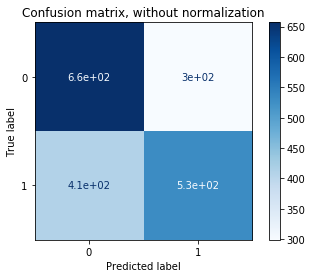

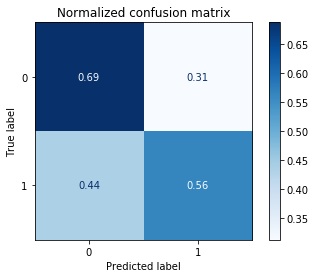

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Decision Trees Parameters
dtp_params = {'max_features': ('sqrt','log2'),
    'max_depth': [4,5,6,7,8,9],
    'min_samples_leaf': [2,3,4,5]}
NFOLDS = 10
folds = KFold(n_splits=NFOLDS)
splits = folds.split(X_train, y_train)

decitree = DecisionTreeClassifier()
dtr = GridSearchCV(decitree, dtp_params, scoring='neg_log_loss', refit=True, cv = splits)
dtr.fit(X_train,y_train)


dtr.score(X_test,y_test)

#np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dtr, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

dtr_yhat_prob = dtr.predict_proba(X_test)[:,1]
dtr_yhat = dtr.predict(X_test)



## Logistic Regression

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Confusion matrix, without normalization
[[671 285]
 [320 621]]
Normalized confusion matrix
[[0.70188285 0.29811715]
 [0.34006376 0.65993624]]


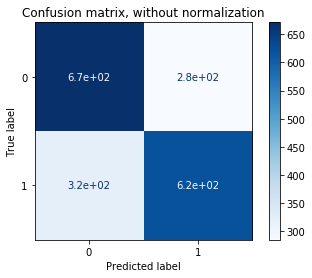

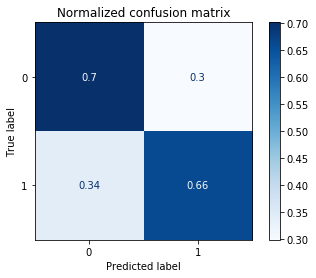

NameError: name 'test_df' is not defined

In [68]:
from sklearn.linear_model import LogisticRegression
lr_params = {'C': np.logspace(start=-5, stop=3, num=100)}
NFOLDS = 10
folds = KFold(n_splits=NFOLDS)
splits = folds.split(X_train, y_train)
logreg = LogisticRegression()
lr = GridSearchCV(logreg, lr_params, scoring='neg_log_loss', refit=True, cv = splits)
lr.fit(X_train,y_train)


In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

lr.score(X_test,y_test)
lr_yhat_prob = lr.predict_proba(X_test)[:,1]
lr_yhat = lr.predict(X_test)
lr_ytest = lr.predict(test_df)

## AdaBoost Regressor

Confusion matrix, without normalization
[[627 329]
 [271 670]]
Normalized confusion matrix
[[0.65585774 0.34414226]
 [0.2879915  0.7120085 ]]


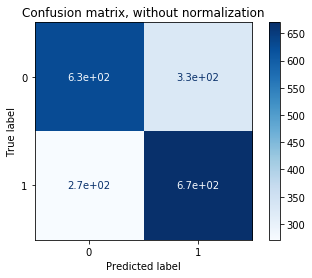

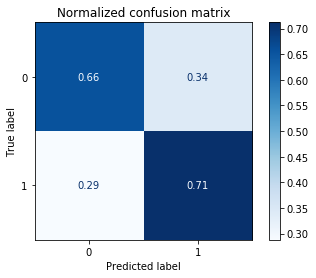

In [69]:
from sklearn.ensemble import AdaBoostClassifier
NFOLDS = 10
folds = KFold(n_splits=NFOLDS)
splits = folds.split(X_train, y_train)


ada_params = {
    'n_estimators': [400,500,600],
    'learning_rate' : [0.01,0.1,0.8,1.0,1.2],
}
ada = AdaBoostClassifier()
adr = GridSearchCV(ada, ada_params, scoring='neg_log_loss', refit=True, cv = splits)
adr.fit(X_train, y_train)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(adr, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

adr.score(X_test,y_test)
adr_yhat_prob = adr.predict_proba(X_test)[:,1]
adr_yhat = adr.predict(X_test)

#adr_ytest=adr.predict(test_df)

## Random Forest

Confusion matrix, without normalization
[[667 289]
 [315 626]]
Normalized confusion matrix
[[0.69769874 0.30230126]
 [0.33475027 0.66524973]]


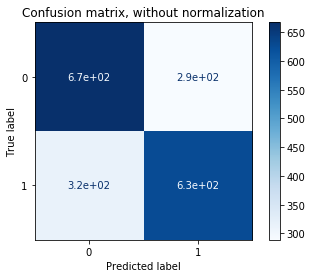

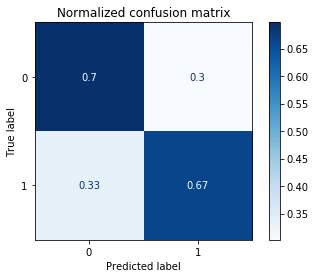

In [70]:
from sklearn.ensemble import RandomForestClassifier

NFOLDS = 10
folds = KFold(n_splits=NFOLDS)
splits = folds.split(X_train, y_train)

rf_params = {
    'n_estimators': [400,600], 
     #'max_features': [0.2,0.4,0,8],
    'max_depth': [4,8],
    'min_samples_leaf': [2,4]
}

rf = RandomForestClassifier(n_jobs=-1,warm_start= True,verbose=0,max_features='sqrt')
rf_search = GridSearchCV(rf, rf_params, scoring='neg_log_loss', refit=True, cv = splits)
rf_search.fit(X_train, y_train)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_search, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

rf_search.score(X_test,y_test)
rf_yhat_prob = rf_search.predict_proba(X_test)[:,1]
rf_yhat = rf_search.predict(X_test)

#rf_ytest = rf_search.predict(test_df)

# Interprétation des résultats

In [85]:
dtr_feature = dtr.best_estimator_.feature_importances_
lr_feature = lr.best_estimator_.coef_
adr_feature = adr.best_estimator_.feature_importances_
rf_search_feature = rf_search.best_estimator_.feature_importances_

In [74]:
dtr_features = [x for x in dtr_feature]
lr_features = [x for x in lr_feature[0]]
adr_features = [x for x in adr_feature]
rf_search_features = [x for x in rf_search_feature]

On affiche cela dans un dataframe pour que ça soit plus lisible

In [78]:
cols = X_train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Decision Tree feature importances': dtr_features,
     'Logistic Regression feature importances': lr_features,
      'AdaBoost feature importances': adr_features,
    'Random Forest feature importances': rf_search_features
    })

In [79]:
feature_dataframe

,features,Decision Tree feature importances,Logistic Regression feature importances,AdaBoost feature importances,Random Forest feature importances
0,Season,0.000000,-0.000111,0.0000,0.016506
1,DayNum,0.000000,-0.000262,0.0000,0.027054
2,Team0_ID,0.000000,-0.000308,0.0000,0.025841
3,Team1_ID,0.000000,0.000241,0.0000,0.024106
4,SeedT1,0.126061,0.064508,0.1750,0.132792
5,SeedT2,0.612771,-0.058291,0.1025,0.105401
6,WPre,0.029778,-0.007174,0.0000,0.032025
7,LPre,0.016873,0.005942,0.0000,0.029435
8,WPre3,0.000000,-0.005433,0.0000,0.024811
9,LPre3,0.000000,0.001086,0.0000,0.020527


# Deuxième prédiction à partir de la sortie du premier modèle

In [80]:
base_predictions_train = pd.DataFrame( {'DecisionTreeClassifier': dtr.predict(X_train).ravel(),
     'LogisticRegression': lr.predict(X_train).ravel(),
     'AdaBoost': adr.predict(X_train).ravel(),
      'RandomForest': rf_search.predict(X_train).ravel()
    })
base_predictions_train.head()

,DecisionTreeClassifier,LogisticRegression,AdaBoost,RandomForest
0,1,0,1,1
1,0,0,0,0
2,1,1,1,1
3,0,1,1,1
4,0,0,0,0


In [81]:
!pip install plotly

     |████████████████████████████████| 7.1 MB 311 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=e632462b490e56c412e79a95ad38844d14adbfc014e8912cac7dd0e99f10b3a9
  Stored in directory: /home/lena/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [82]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [84]:
x_train = np.concatenate(( dtr.predict(X_train).reshape(-1,1), lr.predict(X_train).reshape(-1,1), 
                          adr.predict(X_train).reshape(-1,1), rf_search.predict(X_train).reshape(-1,1)), axis=1)
x_test = np.concatenate(( dtr_yhat.reshape(-1,1), lr_yhat.reshape(-1,1),
                         adr_yhat.reshape(-1,1), rf_yhat.reshape(-1,1)), axis=1)

df_train = pd.DataFrame()
df_train['DecisionTreeClassifier']=dtr.predict(X_train)
df_train['LogisticRegression']=lr.predict(X_train)
df_train['AdaBoost']=adr.predict(X_train)
df_train['RandomForest']=rf_search.predict(X_train)
x_train = df_train

df_test = pd.DataFrame()
df_test['DecisionTreeClassifier']=dtr_yhat
df_test['LogisticRegression']=lr_yhat
df_test['AdaBoost']=adr_yhat
df_test['RandomForest']=rf_yhat
x_test = df_test

df_test_set = pd.DataFrame()

df_test_set['DecisionTreeClassifier']=dtr_ytest
df_test_set['LogisticRegression']=lr_ytest
df_test_set['AdaBoost']=adr_ytest
df_test_set['RandomForest']=rf_ytest

test_df=df_test_set


NameError: name 'dtr_ytest' is not defined

## XGBoost

In [72]:
!pip install xgboost

     |████████████████████████████████| 109.7 MB 4.1 kB/s eta 0:00:01    |███████████████████████████▍    | 93.8 MB 212 kB/s eta 0:01:15


In [75]:
import xgboost as xgb
from xgboost import XGBRegressor

In [76]:
params_xgb = {'colsample_bytree': 0.8,                 
              'learning_rate': 0.0003,
              'max_depth': 31,
              'subsample': 1,
              'objective':'binary:logistic',
              'eval_metric':'logloss',
              'min_child_weight':3,
              'gamma':0.25,
              'n_estimators':5000,
              'verbosity':0
              }

In [77]:
NFOLDS = 10
folds = KFold(n_splits=NFOLDS)
columns = x_train.columns
splits = folds.split(x_train, y_train)

y_preds_xgb = np.zeros(test_df.shape[0])
y_train_xgb = np.zeros(x_train.shape[0])
y_test_xgb = np.zeros(x_test.shape[0])

train_df_set = xgb.DMatrix(x_train)
test_df_set = xgb.DMatrix(x_test)
test_set = xgb.DMatrix(test_df)
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    print('Fold:',fold_n+1)
    X_train_f, X_valid_f = x_train[columns].iloc[train_index], x_train[columns].iloc[valid_index]
    y_train_f, y_valid_f = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    train_set = xgb.DMatrix(X_train_f, y_train_f)
    val_set = xgb.DMatrix(X_valid_f, y_valid_f)
    
    clf = xgb.train(params_xgb, train_set, num_boost_round=5000, evals=[(train_set, 'train'), (val_set, 'val')], verbose_eval=100)
    
    y_train_xgb += clf.predict(train_df_set) / NFOLDS
    y_preds_xgb += clf.predict(test_set) / NFOLDS
    y_test_xgb  += clf.predict(test_df_set) / NFOLDS
    del X_train_f, X_valid_f, y_train_f, y_valid_f
    gc.collect()

NameError: name 'x_train' is not defined

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(y_true, y_pred, title, figsize=(7,6)):
    y_pred = y_pred.round().astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Current'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
plot_cm(y_test, y_test_xgb, 'Confusion matrix for XGB model')

# Formatage du fichier à soumettre

In [ ]:
sub_file = pd.read_csv('data/MSampleSubmissionStage1_2020.csv')

In [ ]:
sub_file['Pred']=y_preds_xgb

In [ ]:
sub_file.head()

In [ ]:
sub_file.to_csv("submission_file.csv",index=False)

In [ ]:
!pip install kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions submit -c google-cloud-ncaa-march-madness-2020-division-1-mens-tournament -f submission_file.csv -m "First submission Hackaton"